# Wizeline task for bootcamp

### Carla Garcia

# Import libraries

In [92]:
import pandas as pd
from functools import reduce
from folium import plugins
import folium
import sys
import pandas as pd
import datetime
import branca.colormap
from collections import defaultdict
from folium.plugins import FastMarkerCluster
from folium import Map, FeatureGroup, Marker, LayerControl
from folium.plugins import MarkerCluster


# Load data

In [107]:
dataset=pd.read_csv('.\data\sample.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   producto         1999 non-null   object 
 1   presentacion     1999 non-null   object 
 2   marca            1999 non-null   object 
 3   categoria        1999 non-null   object 
 4   catalogo         1999 non-null   object 
 5   precio           1999 non-null   float64
 6   fechaRegistro    1999 non-null   object 
 7   cadenaComercial  1999 non-null   object 
 8   giro             1999 non-null   object 
 9   nombreComercial  1999 non-null   object 
 10  direccion        1999 non-null   object 
 11  estado           1999 non-null   object 
 12  municipio        1999 non-null   object 
 13  latitud          1229 non-null   float64
 14  longitud         1229 non-null   float64
dtypes: float64(3), object(12)
memory usage: 234.4+ KB


## Calculating required memory

In [86]:
dataset_profeco = pd.read_csv('.\profeco.zip', chunksize=10000000)
def memory_count(chunk):
    return     chunk.memory_usage(deep=True)

def add(previous_result, new_result):
    return previous_result.add(new_result, fill_value=0)

dataset_map=map(memory_count, dataset_profeco)
dataset_reduce=reduce(add,dataset_map)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [87]:
print("The required RAM on peaks will be",dataset_reduce.sum(),"bytes")

The required RAM on peaks will be 62682940849 bytes


In [89]:
current_PC_RAM=34359738368
current_PC_RAM>dataset_reduce.sum()

False

### The current PC ram is not enough to process the entire dataset at same time.
### Chunk processing for extracting only the required columns is the selected technique

In [51]:
#Chunk big file
dataset_profeco = pd.read_csv('.\profeco.zip', chunksize=10000000)

def read_chunk(columns):
    dataset_profeco = pd.read_csv('.\profeco.zip', chunksize=10000000)
    chunk_list = []  # append each chunk df here 
    i=0
    # Each chunk is in df format
    for chunk in dataset_profeco:  
        # perform data filtering 
        chunk_filter = chunk[columns]
        print(i)
        # Once the data filtering is done, append the chunk to list
        chunk_list.append(chunk_filter)
        i=i+1
    # concat the list into dataframe 
    df_concat = pd.concat(chunk_list)
    return df_concat

#Other test saving in files
batch_no=1
for chunk in dataset_profeco:
    chunk.to_csv('chunk'+str(batch_no)+'.csv',index=False)
    batch_no+=1

## Q1 Process

In [24]:
#Extraction
COLUMNS_Q1=['cadenaComercial']
dataset_Q1=dataset['cadenaComercial']
dataset_Q1=read_chunk(COLUMNS_Q1)
#Transformation
count_cadena_comercial_Q1=dataset_Q1.nunique()
del dataset_Q1

0
1
2
3
4
5
6


## Q2 Process

### Process that only work with sample.csv

In [41]:
#Extraction
COLUMNS_Q2=['estado','producto']
dataset_Q2=dataset[COLUMNS_Q2]
#dataset_Q2=read_chunk(COLUMNS_Q2)
#Transformation
top_10_products=dataset_Q2.groupby(COLUMNS_Q2,group_keys=False)['producto'].count()
top_10_products_filter=top_10_products.groupby("estado",group_keys=False).nlargest(10)
del dataset_Q2
top_10_products_filter


estado            producto               
DISTRITO FEDERAL  DETERGENTE P/ROPA          25
                  LECHE ULTRAPASTEURIZADA    23
                  REFRESCO                   22
                  CHILES EN LATA             21
                  MAYONESA                   20
                  SHAMPOO                    18
                  TELEVISORES                17
                  GALLETAS DULCES            16
                  JABON DE TOCADOR           16
                  FUD                        14
MÉXICO            REFRESCO                   26
                  DETERGENTE P/ROPA          24
                  SHAMPOO                    19
                  CHILES EN LATA             18
                  LECHE ULTRAPASTEURIZADA    17
                  MAYONESA                   17
                  TOALLA FEMENINA            17
                  DESODORANTE                15
                  TELEVISORES                15
                  YOGHURT                    1

### Process that work with big file

In [44]:
#Extraction
COLUMNS_Q2=['estado','producto','marca']
dataset_Q2=read_chunk(COLUMNS_Q2)
#dataset_Q2=pd.read_csv(r'.\top_10_raw_data.csv')
#Transformation
#group per state and product count.
top_10_products=dataset_Q2.groupby(['estado','producto'],group_keys=False)['producto'].count()
#convert series to dataframe.
df=pd.DataFrame(top_10_products)
#rename column with counts to cuenta
df=df.rename(columns={'producto':'cuenta'})
#reset previous index
df=df.reset_index()
#sort values by state and cuenta
df=df.sort_values(['estado','cuenta'],ascending=(True,False))
#group by estado and only take the first 10
df_10=df.groupby('estado',group_keys=False).head(10)
del dataset_Q2
df_10.head(50)

0
1
2
3


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (5,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


4
5
6


,estado,producto,cuenta
397,AGUASCALIENTES,FUD,12005
302,AGUASCALIENTES,DETERGENTE P/ROPA,10188
520,AGUASCALIENTES,LECHE ULTRAPASTEURIZADA,9824
813,AGUASCALIENTES,SHAMPOO,9654
762,AGUASCALIENTES,REFRESCO,9481
301,AGUASCALIENTES,DESODORANTE,8859
467,AGUASCALIENTES,JABON DE TOCADOR,8517
214,AGUASCALIENTES,CHILES EN LATA,7946
930,AGUASCALIENTES,YOGHURT,7401
575,AGUASCALIENTES,MAYONESA,7173


## Q3 process

In [5]:
#Extraction
COLUMNS_Q3=['cadenaComercial','producto']
#dataset_Q3=dataset[COLUMNS_Q3]
dataset_Q3=read_chunk(COLUMNS_Q3)
#Transformation
cadena_per_product=dataset_Q3.groupby(['cadenaComercial']).producto.count()
cadena_most_monitoring_prod=cadena_per_product.nlargest(1).reset_index()
cadena_most_monitoring_prod['cadenaComercial'][0:]
del dataset_Q3

0
1
2
3


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (5,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


4
5
6


# Q1 How many commercial chains are monitored, and therefore, included in this database?


In [60]:
print(f"There are {count_cadena_comercial_Q1[0]} commercial chains which products are  monitored")

There are 705 commercial chains which products are  monitored


#  Q2 What are the top 10 monitored products by State?

In [45]:
path=r'.\top_10_per_state.csv'
df_10.to_csv('example.csv')
print(f"Top 10 products by state can be reviewed in {path}")

Top 10 products by state can be reviewed in .\top_10_per_state.csv


# Q3 Which is the commercial chain with the highest number of monitored products?

In [79]:
print(f" Comercial chain with highest number of monitored products is: {cadena_most_monitoring_prod['cadenaComercial'].values[0]}")

NameError: name 'cadena_most_monitoring_prod' is not defined

In [7]:
cadena_most_monitoring_prod

,cadenaComercial,producto
0,WAL-MART,8643133


# Q4 Use the data to find an interesting fact
## All this example analysis  scope is to Mexico city, Cocacola, 355 ml can. It can be easily applied to other products and states just changing the parameters to filter.

In [142]:
#This function gets latitudes per state to make a heatmap
def get_lats_state_giro(chunk):
    #Parameters to filter in a better way this needs to be queried in using the function
    estado='CAMPECHE'
    giro='TIENDA DE AUTOSERVICIO'
    year=2011
    #Select the required columns
    chunk=chunk[['latitud','longitud','estado','fechaRegistro','giro']]
    #Filtering actions
    chunk=chunk[chunk['estado']==estado]
    chunk=chunk[chunk['giro']==giro]
    #Dropping nulls
    chunk=chunk.dropna()
    #Modifing type to date
    chunk['fechaRegistro']=pd.to_datetime(chunk['fechaRegistro'])
    chunk=chunk[chunk['fechaRegistro'].dt.year==year]
    chunk['Timestamp']=chunk['fechaRegistro'].dt.strftime('%m/%Y')
    date_strings=chunk['Timestamp'].unique()
    #Format data for the heat map
    heat_data = [[[row['latitud'],row['longitud']] for index,row in chunk[chunk['Timestamp'] == fecha].iterrows()] for fecha in date_strings]
    return heat_data

#This function returns a dataset with prices per location the objective is to map the cheaper places to find this product in
#the selected state.
def get_better_price(chunk):
    #Parameters to filter in a better way this needs to be queried in using the function
    estado='DISTRITO FEDERAL'
    producto='REFRESCO'
    marca='COCA COLA'
    presentacion='LATA 355 ML.'
    #Select the required columns
    chunk=chunk[['latitud','longitud','estado','producto','fechaRegistro','precio','presentacion','marca','nombreComercial']]
    #Filtering actions
    chunk=chunk[chunk['estado']==estado]
    chunk=chunk[chunk['marca']==marca]
    chunk=chunk[chunk['producto']==producto]
    chunk=chunk[chunk['presentacion']==presentacion]
    # Ensure handling this parameters as floats
    chunk['latitud'] = chunk['latitud'].astype(float)
    chunk['longitud'] = chunk['longitud'].astype(float)
    chunk['precio'] = chunk['precio'].astype(float)
    #dropping rows with nulls.
    chunk=chunk.dropna()
    #Formatting date/time
    chunk['fechaRegistro']=pd.to_datetime(chunk['fechaRegistro'])
    chunk['Timestamp']=chunk['fechaRegistro'].dt.strftime('%m/%Y')
    date_strings=chunk['Timestamp'].unique()
    #Making agregation with minimum prices.
    Best_prices=chunk.groupby(['presentacion','nombreComercial','latitud','longitud','Timestamp'],group_keys=False).agg({'precio':'min'})
    Best_prices=pd.DataFrame(Best_prices)
    Best_prices.head()
    Best_prices=Best_prices.reset_index()
    Best_prices_map=Best_prices[['latitud','longitud','precio']]
    #Formatting to plot in map 
    Best_prices_map=Best_prices_map.values.tolist()
    return Best_prices_map

#The objective of this function is to return prices ordered by price, The information extracted from this function is
#to  plot a time series to review the behavior of price over time
def get_better_price_TOP10(chunk):
    #Parameters to filter in a better way this needs to be queried in using the function
    estado='DISTRITO FEDERAL'
    producto='REFRESCO'
    marca='COCA COLA'
    presentacion='LATA 355 ML.'
    #Select the required columns
    chunk=chunk[['latitud','longitud','estado','producto','fechaRegistro','precio','presentacion','marca','nombreComercial']]
    #Filtering actions
    chunk=chunk[chunk['estado']==estado]
    chunk=chunk[chunk['marca']==marca]
    chunk=chunk[chunk['producto']==producto]
    chunk=chunk[chunk['presentacion']==presentacion]
    # Ensure handling this parameters as floats
    chunk['latitud'] = chunk['latitud'].astype(float)
    chunk['longitud'] = chunk['longitud'].astype(float)
    chunk['precio'] = chunk['precio'].astype(float)
    #dropping rows with nulls.
    chunk=chunk.dropna()
    #Formatting date/time
    chunk['fechaRegistro']=pd.to_datetime(chunk['fechaRegistro'])
    chunk['Timestamp']=chunk['fechaRegistro'].dt.strftime('%m/%Y')
    date_strings=chunk['Timestamp'].unique()
    Best_prices=chunk.groupby(['presentacion','nombreComercial','latitud','longitud','Timestamp'],group_keys=False).agg({'precio':'avg'})
    Best_prices=pd.DataFrame(Best_prices)
    Best_prices.head()
    Best_prices=Best_prices.reset_index()
    Best_prices=Best_prices.sort_values(['precio','nombreComercial','presentacion','Timestamp'],ascending=(True,True,False,False))
    #Return the cheaper prices in a dataframe
    return Best_prices

    
    

## Example1: Which are the places with more monitored products? Which are located the places with the cheapest price for this product?

### Make map to process data in chunks

In [139]:
dataset_profeco = pd.read_csv('.\profeco.zip', chunksize=100000)
better_price_map=map(get_better_price,dataset_profeco)

### Combine results of each chunk

In [70]:
new=[]
for elem in better_price_map:
    for subset in elem:
        new.append(subset)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Normalize price to 0 to 1 value

In [71]:
prices=[elem[2] for elem in new]
#(x-min(x))/(max(x)-min(x))
new2=[[elem[0],elem[1],(elem[2]-min(prices))/(max(prices)-min(prices))] for elem in new]

In [74]:
len(prices)

13494

### Create map using folium

In [187]:
#define map legend and color bar
map_hooray = folium.Map(location=[19.4424, -99.1309882],zoom_start = 5)
steps=20
colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)
gradient_map=defaultdict(dict)
for i in range(steps):
    gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
colormap.add_to(map_hooray) #add color bar at the top of the map
plugins.HeatMap(new2,radius=15, blur = 10, min_opacity = 0, max_val = 1,gradient = gradient_map).add_to(map_hooray)
#Divide minimum prices in 3 subsets for each tertile where green are the middle price, red the highest and orange the lowest.
color_green=[[elem[0],elem[1],elem[2]] for elem in new2 if ((elem[2]>=0.33) and (elem[2]<=0.66))]
color_red=[[elem[0],elem[1]] for elem in new2 if (elem[2]>0.66)]
color_orange=[[elem[0],elem[1]] for elem in new2 if (elem[2]<0.33)]
#Add the markers to the map
marker_cluster = MarkerCluster().add_to(map_hooray)
'''callback = """\
function (row) {
    var icon, marker;
    icon = L.AwesomeMarkers.icon({
        icon: "map-marker", markerColor: "red"});
    marker = L.marker(new L.LatLng(row[0], row[1]));
    marker.setIcon(icon);
    return marker;
};
"""
map_hooray.add_child(FastMarkerCluster(color_red,callback=callback))'''
callback = """\
function (row) {
    var icon, marker;
    icon = L.AwesomeMarkers.icon({
        icon: "map-marker", markerColor: "orange"});
    marker = L.marker(new L.LatLng(row[0], row[1]));
    marker.setIcon(icon);
    return marker;
};
"""
map_hooray.add_child(FastMarkerCluster(color_orange,callback=callback))
map_hooray.save('heat_map_cheaper_locations.html')

## Example 2 Which is the behavior of the average cost per yearly/month grouped by store?

### Make map to process data in chunks

In [169]:
dataset_profeco = pd.read_csv('.\profeco.zip', chunksize=100000)
better_price=map(get_better_price_TOP10,dataset_profeco)
test=pd.DataFrame()
data=list(better_price)
df_concat = pd.concat(data)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Group data by yearly/month time stamp and store

In [176]:
df_concat.info()
df_dateinex = df_concat.set_index(pd.DatetimeIndex(df_concat['Timestamp']))
GB=df_dateinex.groupby([pd.Grouper(freq='M'),'nombreComercial'])['precio'].mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13494 entries, 8 to 4
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   presentacion     13494 non-null  object 
 1   nombreComercial  13494 non-null  object 
 2   latitud          13494 non-null  float64
 3   longitud         13494 non-null  float64
 4   Timestamp        13494 non-null  object 
 5   precio           13494 non-null  float64
dtypes: float64(3), object(3)
memory usage: 738.0+ KB


In [178]:
GB

Timestamp   nombreComercial                         
2011-01-31  AURRERA BODEGA SUCURSAL CANTIL              6.750
            AURRERA BODEGA SUCURSAL IZTAPALAPA          7.500
            AURRERA BODEGA SUCURSAL LA VIGA             7.500
            AURRERA BODEGA SUCURSAL MARIANO ESCOBEDO    7.500
            AURRERA BODEGA SUCURSAL PLAZA CHURUBUSCO    7.500
                                                        ...  
2016-04-30  WALMART SUCURSAL LOMAS                      9.000
            WALMART SUCURSAL PLAZA ORIENTE              8.875
            WALMART SUCURSAL TEPEYAC                    8.900
            WALMART SUCURSAL TLALPAN                    8.625
            WALMART SUCURSAL VILLA COAPA                9.000
Name: precio, Length: 4164, dtype: float64

### Plotting a subset of to exemplify the behavior in cost

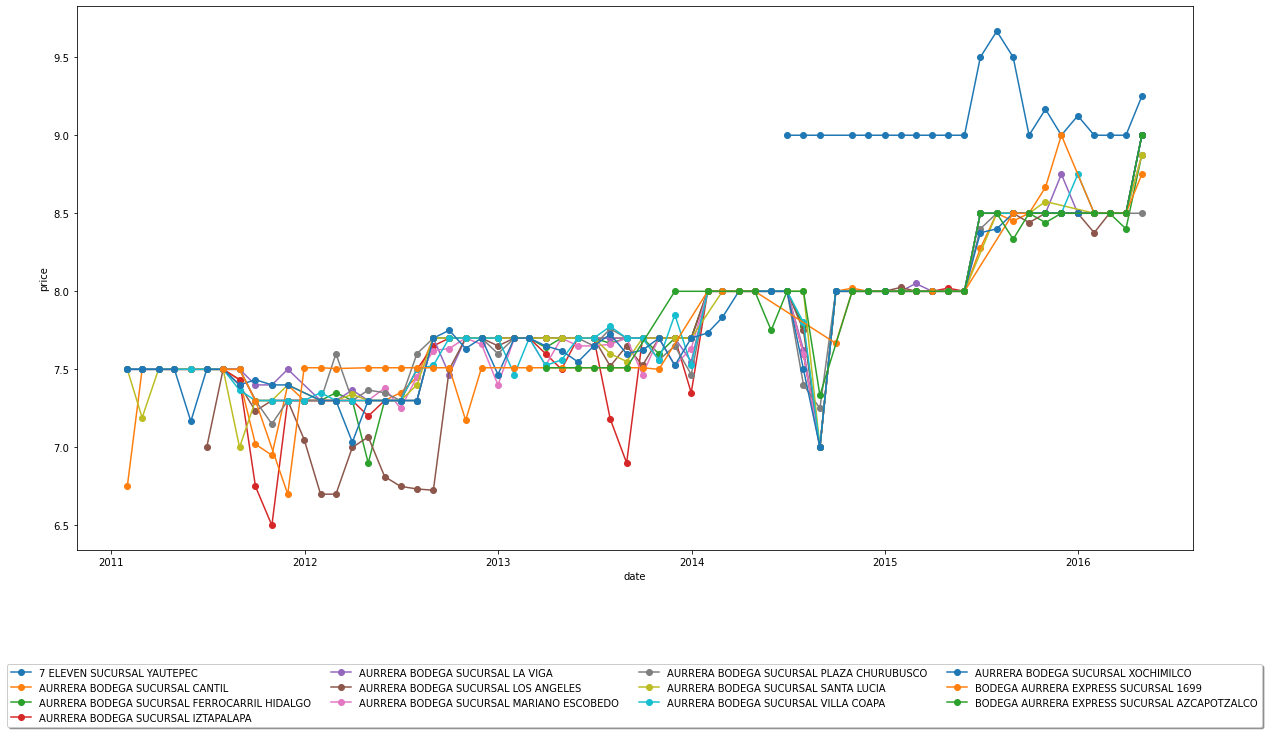

In [192]:
import matplotlib.pyplot as plt
j=0
df_reset=GB.reset_index()
plt.figure(figsize=(20,10))
for i in df_reset.groupby('nombreComercial'):
    if(j>12):
        break
    else:
        plt.plot(i[1].Timestamp,i[1].precio,'-o',label=i[0])
    j=j+1

plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True,
           shadow=True,
           ncol=4)
plt.xlabel('date')
plt.ylabel('price')
plt.show()

## Calculating inflation in this product per year

In [186]:
#[(IPC final - IPC inicial) / IPC inicial] x 100
GB_inflacion=df_dateinex.groupby([pd.Grouper(freq='A')])['precio'].mean()
GB_inflacion=GB_inflacion.reset_index()
GB_inflacion['inflacion'] = ((GB_inflacion.precio - GB_inflacion.precio.shift(1))/ GB_inflacion.precio.shift(1))*100;
GB_inflacion

,Timestamp,precio,inflacion
0,2011-12-31,7.408070,NaN
1,2012-12-31,7.396306,-0.158793
2,2013-12-31,7.586890,2.576738
3,2014-12-31,7.922729,4.426573
4,2015-12-31,8.321799,5.037033
5,2016-12-31,8.556887,2.824959
